**This notebook builds a CART classifier model on 10% of the entire data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import re

In [3]:
data = pd.read_csv('finaltrain_V2.csv')
data.head()

,msno,Sum_num_unq,Avg_num_unq,Sum_total_number_songs,Avg_total_number_songs,Sum_total_secs,Avg_total_secs,Avg_total_score,bd,registered_via,...,city_15,city_16,city_17,city_18,city_19,city_20,city_22,is_female,is_male,is_missing
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,885.0,28.548387,1089.0,35.129032,192527.891052,6210.577131,46.353226,28.0,7.0,...,0,0,0,0,0,0,0,0,0,1
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,468.0,16.714286,567.0,20.250000,115411.258972,4121.830678,35.864643,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,828.0,39.428571,970.0,46.190476,149896.558472,7137.931356,51.978095,28.0,7.0,...,0,0,0,0,0,0,0,0,0,1
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,230.0,7.931034,682.0,23.517241,116433.246857,4014.939547,36.092069,21.0,7.0,...,0,0,0,1,0,0,0,0,1,0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,223.0,10.619048,233.0,11.095238,36636.637947,1744.601807,13.830476,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# creating a function to snakify column names
def snakify(column_name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [5]:
data.columns = [snakify(col) for col in data.columns]

In [6]:
data[lambda data: data.columns[:17]].head()

,msno,sum_num_unq,avg_num_unq,sum_total_number_songs,avg_total_number_songs,sum_total_secs,avg_total_secs,avg_total_score,bd,registered_via,registration_init_time,registration_init_days,no_of_transactions,no_of_cancellations,cancelled,total_amount_paid,is_auto_renew
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,885.0,28.548387,1089.0,35.129032,192527.891052,6210.577131,46.353226,28.0,7.0,2014-06-08,16229 days 00:00:00.000000000,1,0,0,99.0,1.0
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,468.0,16.714286,567.0,20.250000,115411.258972,4121.830678,35.864643,NaN,NaN,NaN,NaN,2,0,0,298.0,1.0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,828.0,39.428571,970.0,46.190476,149896.558472,7137.931356,51.978095,28.0,7.0,2014-09-27,16340 days 00:00:00.000000000,1,0,0,149.0,1.0
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,230.0,7.931034,682.0,23.517241,116433.246857,4014.939547,36.092069,21.0,7.0,2016-03-15,16875 days 00:00:00.000000000,1,0,0,149.0,1.0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,223.0,10.619048,233.0,11.095238,36636.637947,1744.601807,13.830476,NaN,NaN,NaN,NaN,2,0,0,298.0,1.0


In [7]:
data[lambda data: data.columns[:17]].isnull().sum()

msno                           0
sum_num_unq               216409
avg_num_unq               216409
sum_total_number_songs    216409
avg_total_number_songs    216409
sum_total_secs            216409
avg_total_secs            216409
avg_total_score           216409
bd                        271468
registered_via            271468
registration_init_time    271468
registration_init_days    271468
no_of_transactions             0
no_of_cancellations            0
cancelled                      0
total_amount_paid          37382
is_auto_renew              37382
dtype: int64

In [8]:
data['registration_init_days'] = data['registration_init_days'].str.replace(" days 00:00:00.000000000","").astype(float)

In [9]:
cat = ['registered_via', 'is_auto_renew']
intgr = ['sum_num_unq', 'avg_num_unq', 'sum_total_number_songs', 'avg_total_number_songs', 'sum_total_secs', 'avg_total_secs',
        'avg_total_score', 'bd', 'registration_init_days', 'total_amount_paid']

In [10]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier as CART
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, f1_score
from sklearn.preprocessing import Imputer

In [11]:
# dropping column that holds the same info as 'registration_init_days'
data = data.drop(['registration_init_time'], axis=1)

# imputing median values to nulls of continuous variables and mode to categoricals
imp_int = Imputer(strategy='median')
imp_cat = Imputer(strategy='most_frequent')

data[intgr] = imp_int.fit_transform(data[intgr])
data[cat] = imp_cat.fit_transform(data[cat])

In [12]:
len(data)

970960

In [13]:
X, y = data.drop(['is_churn', 'msno'], axis=1), data['is_churn']

# creating a sample of almost 100,000 rows of the data
s_100k = StratifiedShuffleSplit(n_splits=5, test_size=0.1, random_state=13)
for train_index, test_index in s_100k.split(X, y):
    X_hold, y_hold = X.loc[train_index], y.loc[train_index]
    # creating the sample to run CART on
    X_sample, y_sample = X.loc[test_index], y.loc[test_index]

In [14]:
print len(y_sample)
y_sample.value_counts()

97096


0    88363
1     8733
Name: is_churn, dtype: int64

In [15]:
# resetting the index of X & y samples prior to creating train and test sets since these dataframes are indexed out of order
X_sample.reset_index(drop=True, inplace=True)
y_sample.reset_index(drop=True, inplace=True)

In [16]:
y_sample.head()

0    0
1    1
2    0
3    0
4    0
Name: is_churn, dtype: int64

In [17]:
# splitting sample into train and test
s_sample = StratifiedShuffleSplit(test_size=0.3, random_state=13)
for tr_index, te_index in s_sample.split(X_sample, y_sample):
    X_train, y_train = X_sample.loc[tr_index], y_sample.loc[tr_index]
    X_test, y_test = X_sample.loc[te_index], y_sample.loc[te_index]

In [18]:
print len(y_train)
print len(y_test)
y_test.value_counts()

67967
29129


0    26509
1     2620
Name: is_churn, dtype: int64

In [19]:
cart_1 = CART()
cart_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
for score, feature in sorted(zip(cart_1.feature_importances_, X_train.columns), reverse=True):
    print score, feature

0.422743692502 plan_days_30
0.130539476492 no_of_cancellations
0.0607627174495 registration_init_days
0.0495693408944 total_amount_paid
0.0481132546769 no_of_transactions
0.0360698495654 sum_num_unq
0.0308611983196 sum_total_secs
0.0304285413711 avg_total_score
0.0302635036913 avg_total_number_songs
0.0295565142231 sum_total_number_songs
0.0275945490834 avg_num_unq
0.0267994056346 avg_total_secs
0.0143259161873 is_auto_renew
0.0112142622403 payment_method_41
0.0097603322755 payment_method_39
0.00879087162107 bd
0.0039405700315 is_missing
0.0019924029073 payment_method_40
0.00188464181178 payment_method_29
0.0018115312552 list_price_149
0.00168773621738 is_male
0.00143999516325 registered_via
0.00140878020864 city_13
0.00139856901281 city_15
0.00106461566747 is_female
0.00103659650572 city_1
0.000980964010044 city_22
0.000956315544647 city_4
0.000869391550016 payment_method_36
0.000856477359818 payment_method_30
0.000801191824816 plan_days_60
0.00076271091285 payment_method_32
0.0007574

In [21]:
y_pred = cart_1.predict(X_test)

In [22]:
cart_1.score(X_test, y_test)

0.9551649558858869

In [23]:
confusion_matrix(y_test, y_pred)

array([[25814,   695],
       [  611,  2009]], dtype=int64)

**4.5% missclassified**

In [24]:
f1_score(y_test, y_pred)

0.75469571750563491

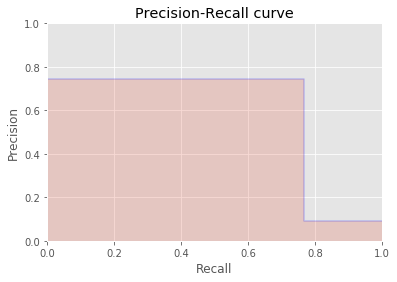

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, alpha=0.2, where='post', color='b')
plt.fill_between(recall, precision, step='post', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')

In [27]:
# Running the model on the data held out (873864 observations)
y_hold_pred = cart_1.predict(X_hold)
print f1_score(y_hold, y_hold_pred)
confusion_matrix(y_hold, y_hold_pred)

0.760945846699


array([[775169,  20098],
       [ 17985,  60612]], dtype=int64)

In [29]:
cart_1.score(X_hold, y_hold)

0.9564199921269213

**4.3% misclassified**

**We shall adopt cross-validation in the next phase of the learning process and re-evaluate our model**